### Practice Exercise(Polynomial Regression)

In [2]:
#loading the file

from pathlib import Path
import sys
current_dir = Path.cwd()
project_root = current_dir.parent.absolute()

sys.path.insert(0,str(project_root))

from config import USED_CAR


In [3]:
#Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#loading the dataset
df = pd.read_csv(USED_CAR)

print(f'Shape of the Dataset: {df.shape}\n')
print(f'Missing values in each columns\n {df.isnull().sum()}\n')

print(f'Data types of each columns\n {df.dtypes}')


df.head()



Shape of the Dataset: (60, 9)

Missing values in each columns
 Age                 0
Mileage             2
Engine_Size         2
Fuel_Type           1
Transmission        1
Brand_Category      1
Previous_Owners     2
Service_History    16
Price               3
dtype: int64

Data types of each columns
 Age                  int64
Mileage            float64
Engine_Size        float64
Fuel_Type           object
Transmission        object
Brand_Category      object
Previous_Owners    float64
Service_History     object
Price              float64
dtype: object


,Age,Mileage,Engine_Size,Fuel_Type,Transmission,Brand_Category,Previous_Owners,Service_History,Price
0,3,45000.0,1.5,Petrol,Manual,Economy,1.0,Full,18500.0
1,7,120000.0,2.0,Diesel,Automatic,Mid-Range,2.0,Partial,15200.0
2,2,25000.0,1.8,Electric,Automatic,Luxury,1.0,Full,42000.0
3,5,78000.0,1.5,Petrol,Manual,Economy,2.0,NaN,12500.0
4,10,150000.0,1.2,Petrol,Manual,Economy,3.0,Partial,6800.0


In [5]:
#Adding new columns
df['Is_Low_Mileage'] =  df['Mileage'].apply(lambda x: 1 if x < 50000 else 0)

df['Mileage_Per_Year'] = (df['Mileage'] / df['Age']).replace(0,1)

In [6]:
df.head()

,Age,Mileage,Engine_Size,Fuel_Type,Transmission,Brand_Category,Previous_Owners,Service_History,Price,Is_Low_Mileage,Mileage_Per_Year
0,3,45000.0,1.5,Petrol,Manual,Economy,1.0,Full,18500.0,1,15000.000000
1,7,120000.0,2.0,Diesel,Automatic,Mid-Range,2.0,Partial,15200.0,0,17142.857143
2,2,25000.0,1.8,Electric,Automatic,Luxury,1.0,Full,42000.0,1,12500.000000
3,5,78000.0,1.5,Petrol,Manual,Economy,2.0,NaN,12500.0,0,15600.000000
4,10,150000.0,1.2,Petrol,Manual,Economy,3.0,Partial,6800.0,0,15000.000000


In [7]:
df.columns

Index(['Age', 'Mileage', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Brand_Category', 'Previous_Owners', 'Service_History', 'Price',
       'Is_Low_Mileage', 'Mileage_Per_Year'],
      dtype='object')

In [8]:
#handling the missing values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

y = df[['Price']].values
X = df.drop('Price',axis=1).values

df_m = df.copy()


str_col = [3,4,5,7]
int_col = ['Age','Mileage','Engine_Size','Previous_Owners']

imputer_mean = SimpleImputer(missing_values=np.nan,strategy='mean')

X[:,[0,2,6]] = imputer_mean.fit_transform(X[:,[0,2,6]])

imputer_frequent = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X[:,[3,4,5,7]] = imputer_frequent.fit_transform(X[:,[3,4,5,7]])

imputer_median_y = SimpleImputer(missing_values=np.nan,strategy='median')
imputer_median_X = SimpleImputer(missing_values=np.nan,strategy='median')

y = imputer_median_y.fit_transform(y)
X[:,[1,9]] = imputer_median_X.fit_transform(X[:,[1,9]])


#Encoding categorial cols using OneHotEncoder
ct = ColumnTransformer(transformers=[('Arson',OneHotEncoder(),str_col)],remainder='passthrough')

X = ct.fit_transform(X)



In [29]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=56)

sc = StandardScaler()

X_train[:,-6:] = sc.fit_transform(X_train[:,-6:])

X_test[:,-6:] = sc.transform(X_test[:,-6:])

In [56]:
#Model Training
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

ln_reg = LinearRegression()

ln_reg.fit(X_train,y_train)

y_pred_train = ln_reg.predict(X_train)
y_pred_test = ln_reg.predict(X_test)

#train model
R2_linear_train = r2_score(y_pred_train,y_train)
mae_linear_train = mean_absolute_error(y_pred_train,y_train)
mse_linear_train = mean_squared_error(y_pred_train,y_train)

#test model
R2_linear_test = r2_score(y_pred_test,y_test)
mae_linear_test = mean_absolute_error(y_pred_test,y_test)
mse_linear_test = mean_squared_error(y_pred_test,y_test)

degrees = [1,2,3]
results_poly = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    X_train_poly =  poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ln_poly = LinearRegression()
    ln_poly.fit(X_train_poly,y_train)

    y_pred_train_poly = ln_poly.predict(X_train_poly)
    y_pred_test_poly = ln_poly.predict(X_test_poly)

    #train model
    R2_score_train = r2_score(y_pred_train_poly,y_train)
    mae_train = mean_absolute_error(y_pred_train_poly,y_train)
    mse_train = mean_squared_error(y_pred_train_poly,y_train)

    #test Model

    R2_score_test = r2_score(y_pred_test_poly,y_test)
    mae_test = mean_absolute_error(y_pred_test_poly,y_test)
    mse_test = np.sqrt(mean_squared_error(y_pred_test_poly,y_test))

    results_poly[degree]  ={
        'poly' : poly,
        'ln_poly' :ln_poly,
        'X_train_poly' : X_train_poly,
        'y_pred_train_poly' : y_pred_train_poly,
        'R2_score_train' :R2_score_train,
        'mae_train' : mae_train,
        'mse_train' : mse_train,
        'R2_score_test' : R2_score_test,
        'mae_test' : mae_test,
        'mse_test' : mse_test
    }





In [58]:
#evaluation 

#R2_score 
df_r2_score = pd.DataFrame({
    'R2 score at degree 1' : [R2_linear_train , R2_linear_test],
    'R2 score at degree 2' : [results_poly[2]['R2_score_train'], results_poly[2]['R2_score_test']],
    'R2 score at degree 3' : [results_poly[3]['R2_score_train'], results_poly[3]['R2_score_test']]
},index=('Train Set', 'Test Set'))

df_mae = pd.DataFrame({
    'MAE at degree 1' : [mae_linear_train, mae_linear_test],
    'MAE at degree 2' : [results_poly[2]['mae_train'], results_poly[2]['mae_test']],
    'MAE at degree 3' : [results_poly[3]['mae_train'],results_poly[3]['mae_test']]
},index=('Train Model','Test Model'))

df_mse = pd.DataFrame({
    'MSE at degree 1' : [mse_linear_train, mse_linear_test],
    'MSE at degree 2' : [results_poly[2]['mse_train'], results_poly[2]['mse_test']],
    'MSE at degree 3' : [results_poly[3]['mse_train'],results_poly[3]['mse_test']]
},index=('Training set', 'Test Set'))
df_mse = df_mse.map(lambda x: f"{x:.2f}")

print(f'R2 Score at different degrees\n')
print(df_r2_score)

print(f'\nMean Absoulte Error at different degree\n {df_mae}')
print(f'\nMean Squared Error at different Degrees\n {df_mse}')


R2 Score at different degrees

           R2 score at degree 1  R2 score at degree 2  R2 score at degree 3
Train Set              0.962959              0.995420              0.995420
Test Set               0.897737             -0.092229             -0.343137

Mean Absoulte Error at different degree
              MAE at degree 1  MAE at degree 2  MAE at degree 3
Train Model      1910.860412       179.166667       179.166667
Test Model       3275.969271     49542.684262     18996.006807

Mean Squared Error at different Degrees
              MSE at degree 1 MSE at degree 2 MSE at degree 3
Training set      6036165.69       770416.67       770416.67
Test Set         19522593.01        75082.91        29479.02


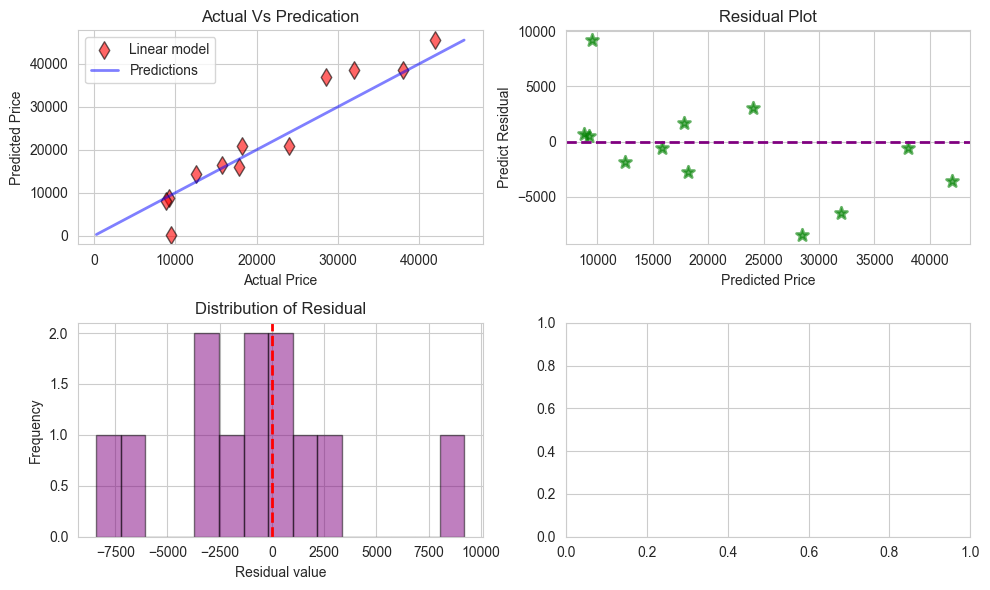

In [94]:
#Visualization
import seaborn as sys

sys.set_style('whitegrid')
sys.set_palette('husl')

fig, axes = plt.subplots(2,2,figsize=(10,6))

ax1 = axes[0,0]
ax1.scatter(y_test,y_pred_test,label='Linear model',color='r',alpha=0.6,marker='d',edgecolors='black',linewidths=1,s=80)

min_val = min(y_test.min(),y_pred_test.min())
max_val = max(y_test.max(),y_pred_test.max())
ax1.plot([min_val,max_val],[ min_val, max_val],linewidth=2,color='blue',alpha=0.5,label='Predictions')
ax1.set_title('Actual Vs Predication')
ax1.set_ylabel('Predicted Price')
ax1.set_xlabel('Actual Price')
ax1.legend()

ax2 = axes[0,1]
Residual = y_test - y_pred_test

ax2.scatter(y_test,Residual,label='Actual Vs Residual',color='green',linewidths=2,s=80,marker='*',alpha=0.6)
ax2.axhline(y=0,color='purple',linestyle='--',linewidth=2)
ax2.set_title('Residual Plot')
ax2.set_ylabel('Predict Residual')
ax2.set_xlabel('Predicted Price')

ax3 = axes[1,0]

ax3.hist(Residual,color='purple',bins=15,edgecolor='black',alpha=0.5)
ax3.axvline(x=0,color='r',linestyle='--',linewidth=2)
ax3.set_title('Distribution of Residual')
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Residual value')

plt.tight_layout()
plt.show()
